# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique Identifier
`brand` | The brand name of the product
`capacity` | The volume of each container (lt/ml)
`city`| The name of the city for each shop 
`container`| The type (nature) of the container.
`date`| Date of sale
`lat`| The latitude of the shop
`long`| The longitude of the shop
`pop` | Population of the city (assumed constant)
`shop` | the shop id
`price`| The average monthly price of the corresponding container (in US `$$`)
`quantity` | The number of containers sold in a month (target variable)

## Data Wrangling & Visualization

In [3]:
data = pd.read_csv('train.csv', index_col=0)

In [4]:
data.head()

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
id,,,,,,,,,,,
0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [5]:
#Explore columns
data.columns

Index(['date', 'city', 'lat', 'long', 'pop', 'shop', 'brand', 'container',
       'capacity', 'price', 'quantity'],
      dtype='object')

In [6]:
#Description
data.describe()

,lat,long,pop,price,quantity
count,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [7]:
df = pd.read_csv("train.csv")

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# def parse_capacity(x):
#     x = str(x).lower().strip()
#     if "ml" in x:
#         return float(x.replace("ml", "").strip())
#     elif "lt" in x:
#         return float(x.replace("lt", "").strip()) * 1000
#     else:
#         return None

# df["capacity"] = df["capacity"].apply(parse_capacity)

df = df.sort_values(["city", "shop", "brand", "date"])
df = df.groupby(["city", "shop", "brand"]).apply(lambda g: g.ffill().bfill())
df = df.reset_index(drop=True)

X = df.drop(columns=["id", "date", "quantity"])
y = df["quantity"]

num_cols = ["lat", "long", "pop", "price", "year", "month", "day"]
cat_cols = [c for c in X.columns if c not in num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(max_iter=10000, random_state=42))
])

param_grid = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_["lasso__alpha"])
print("CV:", -grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Best alpha: 10.0
CV: 8321.469581604304
Test MAE: 8553.497502169344
Test R²: 0.591916746762905


## Visualization, Modeling, Machine Learning

Can you predict future demand and identify how different features influence that? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of mean absolute percent error.**
- **Read the Test.csv file and prepare features for testing.**

In [8]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()


,id,date,city,lat,long,pop,shop,brand,container,capacity,price
0,6480,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10
1,6481,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85
2,6482,31-01-18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83
3,6483,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54
4,6484,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83


In [9]:
test_df = pd.read_csv("test.csv")

test_df["_orig_index"] = range(len(test_df))

test_df["date"] = pd.to_datetime(test_df["date"])
test_df["year"] = test_df["date"].dt.year
test_df["month"] = test_df["date"].dt.month
test_df["day"] = test_df["date"].dt.day
# test_df["capacity"] = test_df["capacity"].apply(parse_capacity)

test_df = test_df.sort_values(["city", "shop", "brand", "date"])
test_df = test_df.groupby(["city", "shop", "brand"]).apply(lambda g: g.ffill().bfill())
test_df = test_df.reset_index(drop=True)

X_test = test_df.drop(columns=["id", "date"], errors="ignore")
y_pred = grid.predict(X_test)
test_df["quantity"] = y_pred

test_df = test_df.sort_values("_orig_index").drop(columns="_orig_index")



**The management wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


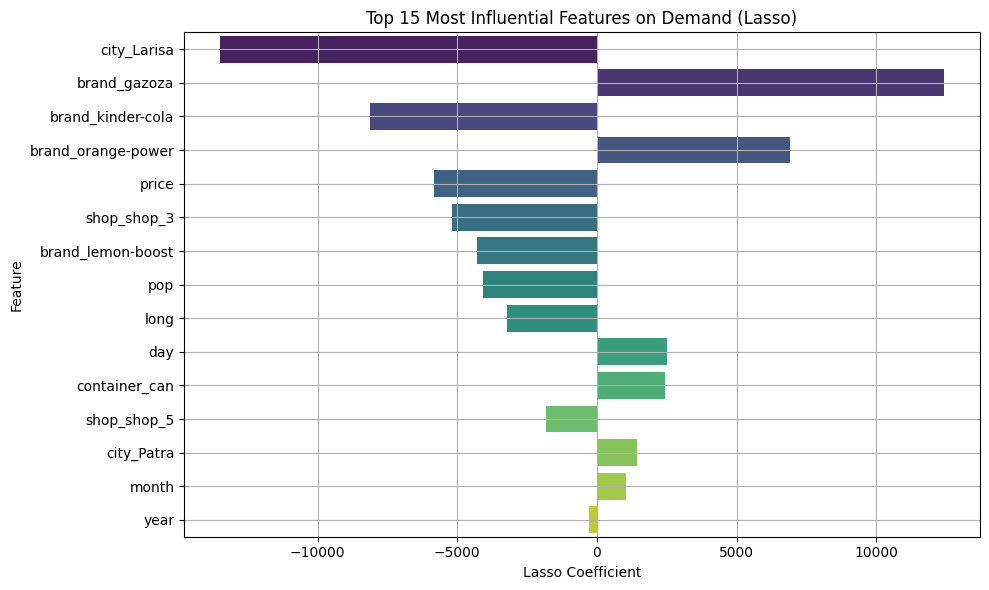

In [10]:
best_model.fit(X, y)

ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(cat_feature_names)

lasso_coef = best_model.named_steps["lasso"].coef_
coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": lasso_coef,
    "abs_coef": np.abs(lasso_coef)
}).sort_values("abs_coef", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="coefficient", y="feature", palette="viridis")
plt.title("Top 15 Most Influential Features on Demand (Lasso)")
plt.xlabel("Lasso Coefficient")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model.** <br/>
    For each record in the test set (`Test.csv`), you must predict the value of the `quantity` variable. You should submit a CSV file with a header row and one row per test entry. 
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **quantity**

In [11]:
#Submission
submission_df = test_df[["id", "quantity"]]
submission_df.to_csv('submissions.csv',index=False)

---